In [1]:
import jieba
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import random
import pickle

In [7]:
class DbscanClustering():
    def __init__(self, stopwords_path=None):
        self.stopwords = self.load_stopwords(stopwords_path)
        self.vectorizer = CountVectorizer()
        self.transformer = TfidfTransformer()
        self.result = {}
        self.corpus_path = ""
        self.num_docs_used = 10000
#         self.sf = []

    def load_stopwords(self, stopwords=None):
        """
        加载停用词
        :param stopwords:
        :return:
        """
        if stopwords:
            with open(stopwords, 'r', encoding='utf-8') as f:
                return [line.strip() for line in f]
        else:
            return []

    def preprocess_data(self, corpus_path):
        """
        文本预处理，每行一个文本
        :param corpus_path:
        :return:
        """
        self.corpus_path = corpus_path
        self.corpus = []
        count = 0
        with open(corpus_path, 'r', encoding='utf-8') as f:
            file1 = open("../data/documents_10000_clean.txt","w")
            for line in f:
                line = line.strip()
                line = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:。？、~@#￥%……&*（）]+", " ", line)
                clean_str = ' '.join([word for word in jieba.lcut(line) \
                                      if word != " " and word != "\t" and word not in self.stopwords])
                file1.write(clean_str + "\n")
                self.corpus.append(clean_str)
                count += 1
                if count == self.num_docs_used: break
            file1.close()
        return self.corpus

    def get_text_tfidf_matrix(self, corpus):
        """
        获取tfidf矩阵
        :param corpus:
        :return:
        """
        
        self.vectorizer.fit(corpus)
        vectorized_corpus = self.vectorizer.transform(corpus)
        self.transformer.fit(vectorized_corpus)
        tfidf = self.transformer.transform(vectorized_corpus)
#         tfidf = self.transformer.fit_transform(self.vectorizer.fit_transform(corpus))

        # 获取词袋中所有词语
#         self.words = self.vectorizer.get_feature_names()

        # 获取tfidf矩阵中权重
        weights = tfidf.toarray()
        return weights

    def pca(self, weights, n_components=5):
        """
        PCA对数据进行降维
        :param weights:
        :param n_components:
        :return:
        """
        self.pca_trans = PCA(n_components=n_components)
        self.pca_trans.fit(weights)
        return self.pca_trans.transform(weights)
    
    def export_result(self):
        #输出结果
        with open(self.corpus_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()
            for cluster, indexes in self.result.items():
                file = open('../data/clusters/' + str(cluster) + '.txt', 'w')
                for index in indexes:
                    file.write("document"+str(index)+": " + lines[index] + "\n")
                file.close()

    def dbscan(self, corpus_path, eps=0.1, min_samples=3, pca_components=5, fig=True):
        """
        DBSCAN：基于密度的文本聚类算法
        :param corpus_path: 语料路径，每行一个文本
        :param eps: DBSCA中半径参数
        :param min_samples: DBSCAN中半径eps内最小样本数目
        :param fig: 是否对降维后的样本进行画图显示
        :return:
        """
        corpus = self.preprocess_data(corpus_path)
        self.weights = self.get_text_tfidf_matrix(corpus)

        self.pca_weights = self.pca(self.weights, pca_components)

        clf = DBSCAN(eps=eps, min_samples=min_samples)

        y = clf.fit_predict(self.pca_weights)

        if fig:
            plt.scatter(self.pca_weights[:, 0], self.pca_weights[:, 1], c=y)
            plt.show()
        
        # 保存参数
        with open('../data/Transformer/CountVecTransformer.pkl', 'wb') as fp:
            pickle.dump(self.vectorizer, fp)
        with open('../data/Transformer/TfidfTransformer.pkl', 'wb') as fp:
            pickle.dump(self.transformer, fp)
        with open('../data/Transformer/PCATransformer.pkl', 'wb') as fp:
            pickle.dump(self.pca_trans, fp)

        # 每个样本所属的簇
        self.labels = [0] * self.num_docs_used
        for text_idx, label_idx in enumerate(y):
            if label_idx not in self.result:
                self.result[label_idx] = [text_idx]
            else:
                self.result[label_idx].append(text_idx)
        #分类标签：异常为0，其余为1
            if label_idx != -1:
                self.labels[text_idx] = 1
        return self.result

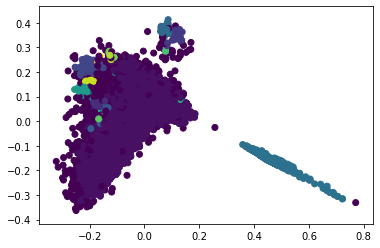

{0: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 179, 180, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 

In [8]:
if __name__ == '__main__':
    dbscan = DbscanClustering(stopwords_path='../data/stop_words.txt')
    result = dbscan.dbscan('../data/documents_labeled.txt', eps=0.04, min_samples=5, pca_components = 5)
    print(result)

In [9]:
#查看异常文档数量
len(result[-1])

808

In [11]:
print(dbscan.pca_weights.shape)
print(len(dbscan.labels))

(10000, 5)
10000


In [42]:
#train a 2-class classifier based on the cluster result
import torch
from torch import nn, optim
import math
from res.plot_lib import plot_data, plot_model, set_default
from IPython import display
import random

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [49]:
#generate shuffle list
random.seed(1)
shuffle_list = [i for i in range(10000)]
random.shuffle(shuffle_list)

#retrieve data
X = dbscan.pca_weights
Y = dbscan.labels

#split training and testing data
X_train, X_test, y_train, y_test = [], [], [], []
for i in range(10000):
    if i < 8000:
        X_train.append(X[shuffle_list[i]])
        y_train.append(y[shuffle_list[i]])
    else:
        X_test.append(X[shuffle_list[i]])
        y_test.append(y[shuffle_list[i]])

#convert np array to torch array
X_train = torch.tensor(X_train).float().to(device)
y_train = torch.tensor(y_train).to(device)
X_test = torch.tensor(X_test).float().to(device)
y_test = torch.tensor(y_test).to(device)

print("Shapes:")
print("X_train:", tuple(X_train.size()))
print("y_train:", tuple(y_train.size()))
print("X_test:", tuple(X_test.size()))
print("y_test:", tuple(y_test.size()))

Shapes:
X_train: (8000, 5)
y_train: (8000,)
X_test: (2000, 5)
y_test: (2000,)


In [23]:
#Model configuration
D, H, C = 5, 20, 2 #dimension, num_hidden_units, num_classes
learning_rate = 1e-3
lambda_l2 = 1e-5
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)

In [58]:
def train(model, X_t, y_t):
    model.to(device)

    criterion = torch.nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

    #Training
    for t in range(1000):
        y_pred = model(X_t)

        loss = criterion(y_pred, y_t)
        score, predicted = torch.max(y_pred, 1)
        acc = (y_t==predicted).sum().float() / len(y_t)
        print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
        display.clear_output(wait=True)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


def test(model, X_t, y_t):
    y_pred = model(X_t)
    score, predicted = torch.max(y_pred, 1)
    acc = (y_t==predicted).sum().float() / len(y_t)
    print("[ACCURACY]: %.3f" % (acc))

In [57]:
train(model, X_train, y_train)

[EPOCH]: 999, [LOSS]: 0.140514, [ACCURACY]: 0.951


In [59]:
test(model, X_test, y_test)

[ACCURACY]: 0.945


In [64]:
torch.save(model, '../data/model/model.pt')

In [65]:
the_model = torch.load('../data/model/model.pt')
test(the_model, X_test, y_test)

[ACCURACY]: 0.945


In [76]:
class AnomalyDetector():
    def __init__(self, model_path, stopwords_path, corpus_path):
        #加载分类器模型
        self.model = torch.load(model_path)
        print("model loaded...")
        
        #加载停用词
        self.stopwords = self.load_stopwords(stopwords_path)
        print("stopwords loaded...")
        
        #加载并处理文档
        self.corpus = self.preprocess_data(corpus_path)
        print("corpus loaded...")
        
        #加载transformers，可讲输入文档变换为特征矩阵
        with open('../data/Transformer/CountVecTransformer.pkl', 'rb') as fp:
            self.CountVecTrans = pickle.load(fp)
        with open('../data/Transformer/TfidfTransformer.pkl', 'rb') as fp:
            self.TfidfTrans = pickle.load(fp)
        with open('../data/Transformer/PCATransformer.pkl', 'rb') as fp:
            self.PCATrans = pickle.load(fp)
        print("transformers loaded...")
        
        #检测异常文档
        self.anomaly_index = self.detect()
        #输出
        self.print_anomaly()
        
    def load_stopwords(self, stopwords=None):
        if stopwords:
            with open(stopwords, 'r', encoding='utf-8') as f:
                return [line.strip() for line in f]
        else:
            return []
        
    def preprocess_data(self, corpus_path):
        corpus = []
        with open(corpus_path, 'r', encoding='utf-8') as f:
            for line in f:
                line = line.strip()
                line = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:。？、~@#￥%……&*（）]+", " ", line)
                clean_str = ' '.join([word for word in jieba.lcut(line) \
                                      if word != " " and word != "\t" and word not in self.stopwords])
                corpus.append(clean_str)
        return corpus
    
    def classify_anomaly(self, model, features):
        res = []
        features = torch.tensor(features).float()
        y_pred = model(features)
        score, predicted = torch.max(y_pred, 1)
        for i in range(len(features)):
            if predicted[i] == 0:
                res.append(i)
                
        return res
    
    def detect(self):        
        #获得语料特征矩阵
        countVec = self.CountVecTrans.transform(self.corpus)
        tfidf = self.TfidfTrans.transform(countVec)
        features = self.PCATrans.transform(tfidf.toarray())
        print("feature extracted...")
        
        #获得异常文档编号
        print("Detecting anomaly.........\n")
        anomaly_index = self.classify_anomaly(self.model, features)
        
        print("Successfully detected anomalies! Anomaly indexes:")
        print(anomaly_index)
        return anomaly_index
    
    def print_anomaly(self):
        with open(corpus_path, 'r') as f:
            lines = f.readlines()
            for idx in self.anomaly_index:
                print(lines[idx])

In [77]:
model_path = '../data/model/model.pt'
stopwords_path = '../data/stop_words.txt'
corpus_path = '../data/documents_股价下跌.txt'
ad = AnomalyDetector(model_path, stopwords_path, corpus_path)

model loaded...
stopwords loaded...
corpus loaded...
transformers loaded...
feature extracted...
Detecting anomaly.........

Successfully detected anomalies! Anomaly indexes:
[5, 11, 50, 311, 695, 704, 1095, 1154, 1256, 2104, 2541, 2548, 2634, 3208, 3381, 3408, 3457, 3507, 3516, 3543, 3545, 3548, 3772, 3781, 3793, 3805, 3813, 4125]
荷兰皇家壳牌跌幅扩大至13 报33.06美元 第一季度转盈为亏 同花顺上线「疫情地图」 点击查看 新型肺炎疫情实时动态地图 gt gt gt 关注同花顺财经 ths518 获取更多机会 责任编辑 zhy

推特盘前跳水 现跌5.56 报29.36美元 此前该股一度涨超13 今日该公司公布了一季报 同花顺上线「疫情地图」 点击查看 新型肺炎疫情实时动态地图 gt gt gt 关注同花顺财经 ths518 获取更多机会 责任编辑 qxb

英特尔盘前跌5.4 此前宣布撤回全年指引 同花顺上线「疫情地图」 点击查看 新型肺炎疫情实时动态地图 gt gt gt 关注同花顺财经 ths518 获取更多机会 责任编辑 lyj

阿里健康 00241.HK 跌幅扩大至约5 现报18.64港元 同花顺上线「疫情地图」 点击查看 新型肺炎疫情实时动态地图 gt gt gt 关注同花顺财经 ths518 获取更多机会 责任编辑 cdh

英特尔盘后跌幅扩大至5.6 发布时间 今天 04 10 nbsp nbsp 消息来源 云财经 阅读原文 影响力评估指数 17.84 nbsp 收藏 已收藏 云财经讯 英特尔盘后跌幅扩大至5.6 新闻标题 时间 消息来源 新闻热度 科新机电2020年一季度董事会经营评述 今天 01 32 同花顺 新证券法喊话投资者保护年报以近万亿元分红作答 今天 00 43 证券日报 五大核心驱动因素推动券商整合 04 23 22 44 同花顺 温氏股份 外资持股比例创新高一季度加快新产能建设 04 23 22 5